**Forecasting insurance price for customers using Regression techniques**

Click here for data source - [Data source](https://www.kaggle.com/mirichoi0218/insurance)

The dataset is a collection of medical cost prices for 1338 instances. The objective is to predict the charges for customers based on certain information available about them. **Feature set is as follows: **

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking status (whether smokes or not)
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

Predicting the charges will require application of regression algorithms such as Random Forest Regressor and Linear Regression, etc. Before diving in to generation of model, there are some steps necessary to render our data into model understandable and usable format. Also, to understand the type of data we are dealing with, studying its features and statistical analysis of data is required. 

**Some of the steps required are -**
* Data description - to view and understand how the data looks like, what features exist - their datatypes and values they hold.
* Target variable - The most important aspect of the data. Charges is our target (to predict) and we see how it is distrubuted in the data.
* Data cleaning and pre-processing - finding and handling missing values, checking for valid column names and valid entries for those column, converting data-types of columns in to model acceptable formats and dealing with categorical variables (by generating dummy variables or by updating exisiting features with binary values).
* Data visualization - To generate hidden insights from the data. For example, smokers are charged higher charges than non-smokers.
**Visualization is also required to figure out which features are responsible for changes in the target variable. This is called feature correlation.** 
* Prepare data, model generation and testing -
This is the part where Machine learning comes in to picture. Data is divided into training and testing sets. Models are produced by learning training data and finally, their performance is evaluated on testing/unseen data.
A good model is capable of accuractely predicting target for unseen instances. 
A poor model maybe a result of excessive parameter tuning (adjusting parameters to perform well precisely on training data), over-fitting (model learns training data too much and does not understand how to deal with new/unseen feature values) or due to structure of data itself (extremely noisy, messy, highly uncorrelated, unevenly distributed, etc.)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the data
data = pd.read_csv("../input/insurance.csv")

# See how top 5 rows of the data look like.
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# How bottom 5 rows look like.
data.tail() 

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [3]:
# Generate statistical summary of the data's numerical features
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Information from above stats - **

Average age of customers is about 39 years with maximum age of 64 years and they have one child on an average with minimum of no child and maximum of 5 children.
75% of observations show 51 years of age and 2 children.
The charges for insurance on an average is 13270.42 units with 75% obseravtions close to 16639.91 units.

In [4]:
# View all column names and their respective data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
# Check for missing values
print(data.isnull().sum())

#All zeros show that there is no missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Text(0.5,1,'Distribution of charges values :')

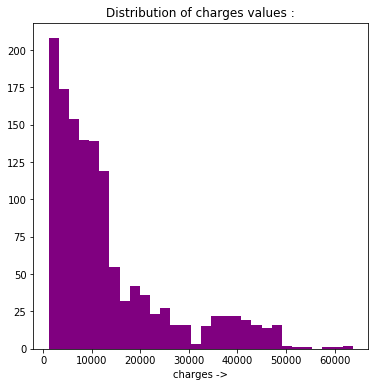

In [6]:
#-------------------- DATA VISUALIZATION -------------------------
# Visualize distribution of values for target variable - 'charges'
plt.figure(figsize=(6,6))
plt.hist(data.charges, bins = 'auto', color = 'purple')
plt.xlabel("charges ->")
plt.title("Distribution of charges values :")

**What we know about target variable?**
* It is unevenly distrubuted.
* Most beneficiaries are charged between 1000 to 10,000 units.
* Very few are charged above 50,000.
* We already know from statistical data description above that mean is 13270.42 (close to lower limit of target range), which inclines the data towards the left of the distribution.

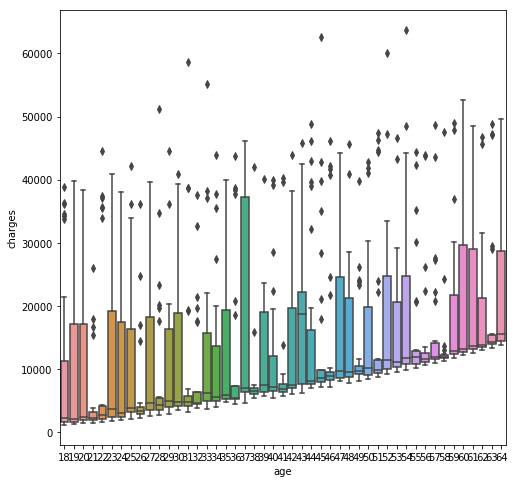

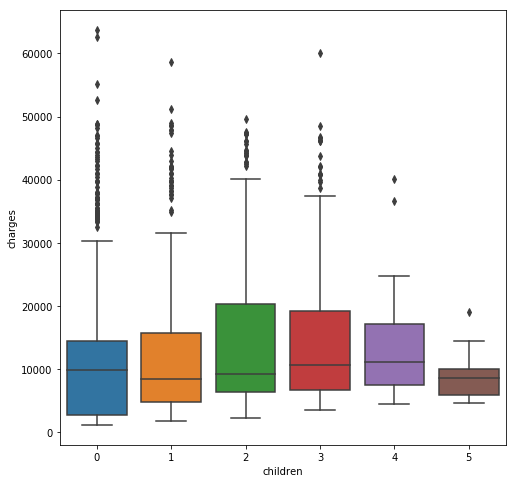

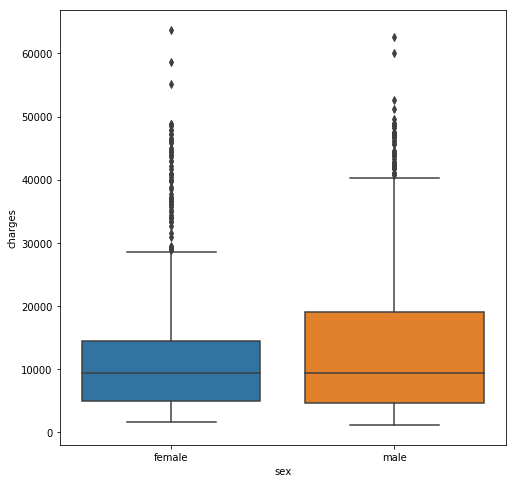

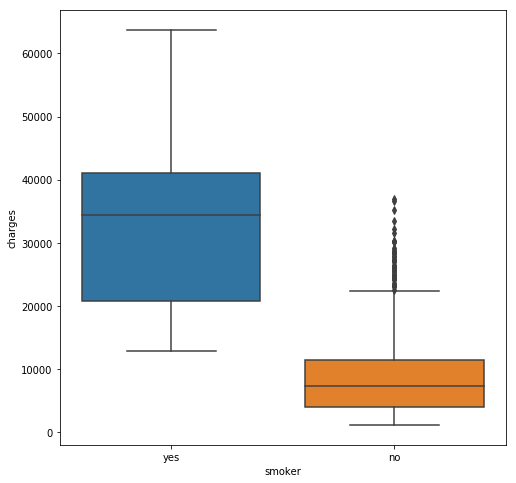

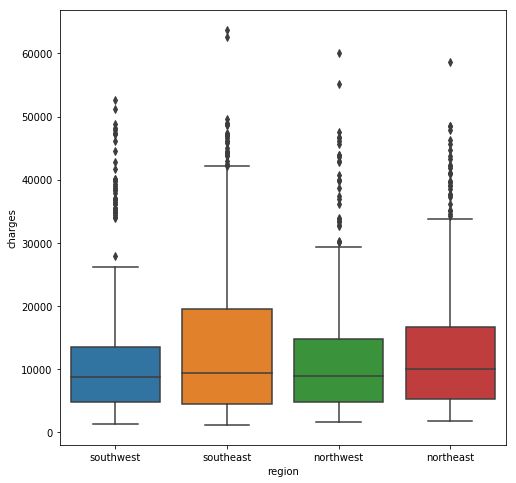

In [7]:
# Generate Box-plots to check for outliers and relation of each feature with 'charges'
cols = ['age', 'children', 'sex', 'smoker', 'region']
for col in cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(x = data[col], y = data['charges'])

**Insights from boxplots generated above -**
* As **age** increases, insurance cost increases. The plots show an increasing trend (with several small ranges for charges for some ages) in charges starting from around 1000 for age 18-19 to about 10,000 or so for customers with age near 60 
    - This may be due to general medical assumption that younger people are more fit or possess robust immune system. 
     - Another reason could be the types of medical conditions covered by the insurance. If the insurance is designed to cover conditions likely to develop with growing age, charges will be higher for older age groups.
* **Customers with 2 children** are charged highest when compared to others. Those with 5 or more children are charged less - This may be due to dominance of group with 2 or 3 children in the entire population.
* Being **a male or female** have lesser impact on cost, even though range for males is larger than for females. That means, males are charged higher in several cases than maximum charges for females.
* The plot shows a clear distribution pattern of high charges for beneficiaries who are **smokers** and considerably low costs for **non-smokers**.
* **Region** does not show much correlation with charges, though, South-east region have larger range up to about 20,000 in its dsitribution of customer charges. - This could be due to medical costs being higher in the region, some pre-known environmental/physical hazards or because it is a well-developed area with higher costs of living. 



In [8]:
# Converting categorical features' string values to int
# Updating directly to binary because only two values exist
data.smoker = [1 if x == 'yes' else 0 for x in data.smoker]
data.sex = [1 if x == 'male' else 0 for x in data.sex]

# Use pandas because multiple values exist for these columns.
data.region = pd.get_dummies(data.region)
data.charges = pd.to_numeric(data.charges)
data.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [9]:
# Create Correlation matrix for all features of data.
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002475,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.002425,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.138156,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.022808,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002811,0.787251
region,0.002475,-0.002425,-0.138156,-0.022808,0.002811,1.000000,0.006349
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006349,1.000000


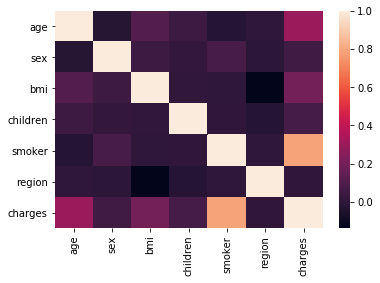

In [10]:
# Generate heatmap to visualize strong & weak correlations.
sns.heatmap(data.corr())

* Above heatmap shows that there is **highest correlation between Charges and whether customer is a smoker** and **lowest correlation between Region and Charges**

Since, there are only few features, it is feasible to generate pairplots for all of them. Otherwise, we would have only generated pairplots for features having high positive or negative correlation with the target variable.

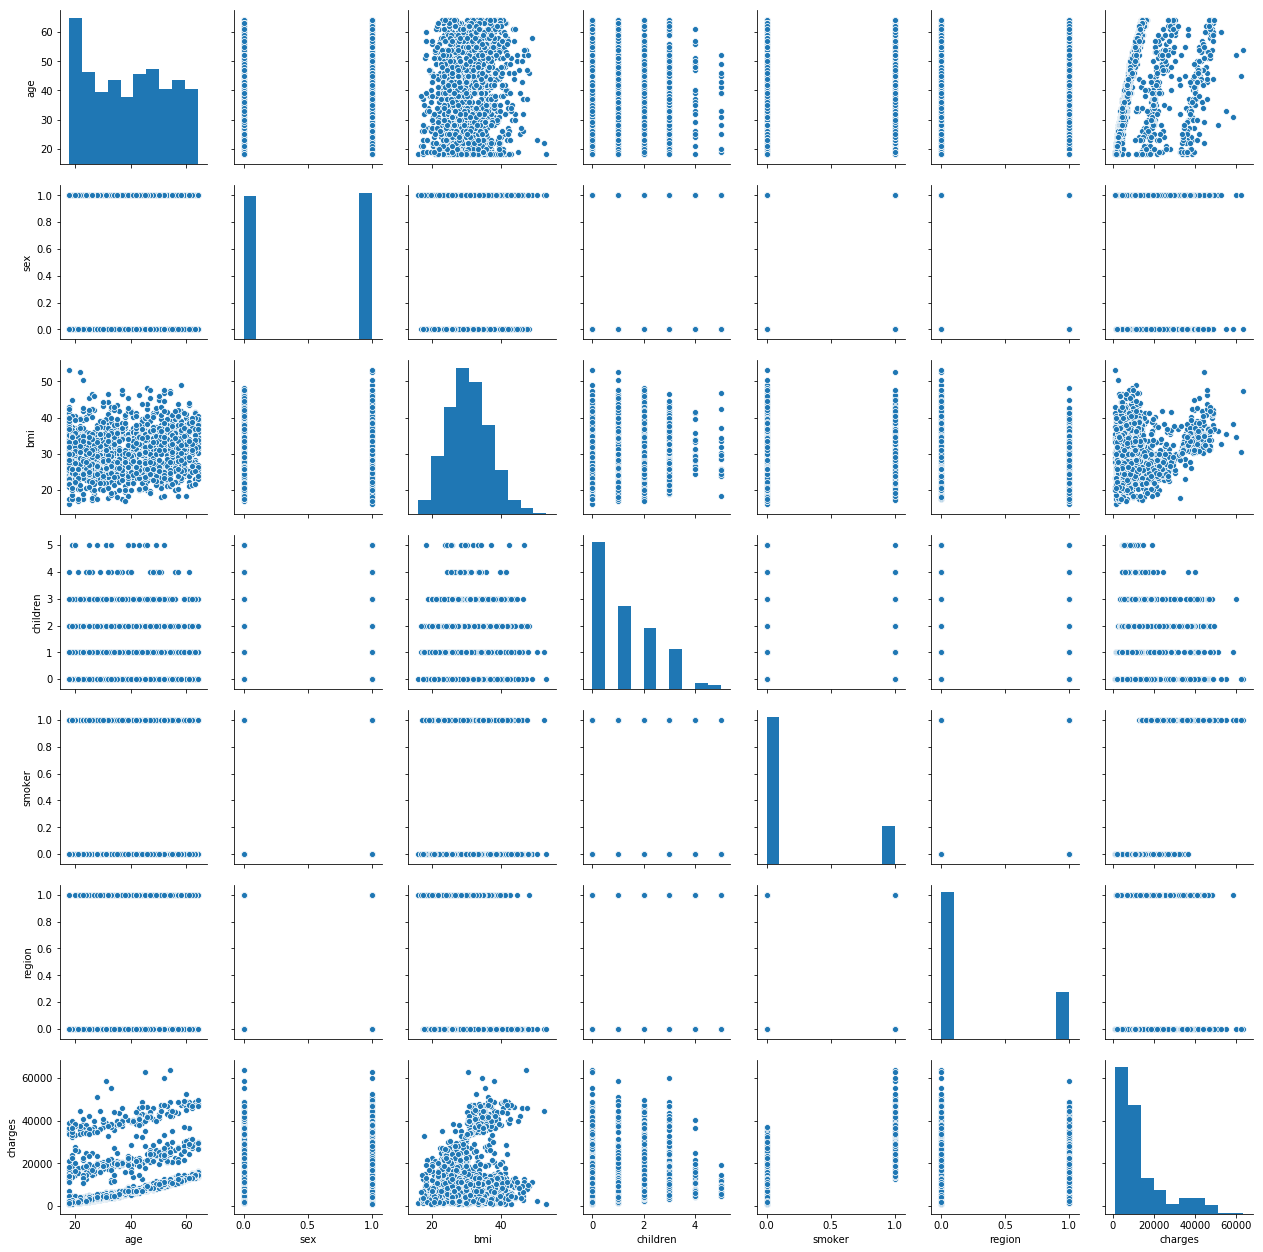

In [11]:
# Generate pairplots for all features because there are only 7 in all.
sns.pairplot(data)

In [12]:
#------------------- Prepare data for predictive regression models ----------------------------
y = data.charges.values
X = data.drop(['charges'], axis = 1)   # Drop the target variable

In [ ]:
# import scikit learn's built-in Machine learning libraries and functions
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Split using 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

# ----------------- PREDICTIVE MODELLING (Call the models to be used) -----------------------
rf_reg = RandomForestRegressor(max_features = 'auto', bootstrap = True, random_state = None)
lin_reg = LinearRegression(normalize = True)
ada_reg = AdaBoostRegressor()

# R2-score is used here as a metric. Any other metric could be used instead by just importing 
# it from sklearn

# Predict using Random Forest Regressor.
rf_reg.fit(X_train, y_train)
predtrainRF = rf_reg.predict(X_train)     # Prediction for train data
predtestRF = rf_reg.predict(X_test)       # Prediction for test data

# Compute R-squared score for both train and test data.
print("R2-score on train data:", r2_score(y_train,predtrainRF))
print("R2-score on test data:", r2_score(y_test, predtestRF))

# Predict using Linear Regression
lin_reg.fit(X_train, y_train)
predtrainL = lin_reg.predict(X_train)
predtestL = lin_reg.predict(X_test)
print("R2-score on train data:",r2_score(y_train, predtrainL))
print("R2-score on test data:",r2_score(y_test, predtestL))

# Predict using XGBoost Regressor
ada_reg.fit(X_train, y_train)
predtrainAda = ada_reg.predict(X_train)
predtestAda = ada_reg.predict(X_test)
print("R2-score on train data:",r2_score(y_train, predtrainAda))
print("R2-score on test data:",r2_score(y_test, predtestAda))

# ----------------- Using Ordinary Least Square from Statsmodel --------------------------------
# -------- Allows to view full summary statistics along with p-value and F-statistics -----------
# On Train data.
X_newtrain = sm.add_constant(X_train)
ols_train = sm.OLS(y_train, X_newtrain)
ols_train_new = ols_train.fit()
print(ols_train_new.summary())

# On Test data.
X_newtest = sm.add_constant(X_test)
ols_test = sm.OLS(y_test, X_newtest)
ols_test_new = ols_test.fit()
print(ols_test_new.summary())   # Produce full statistical summary 

plt.show()

Please feel free to provide your comments/suggestions below and please do **upvote**, if you liked this work.*

Thank you and happy learning!